1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

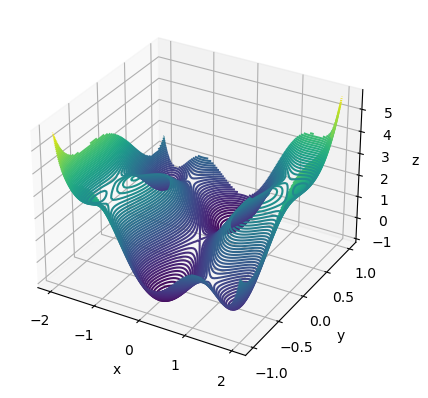

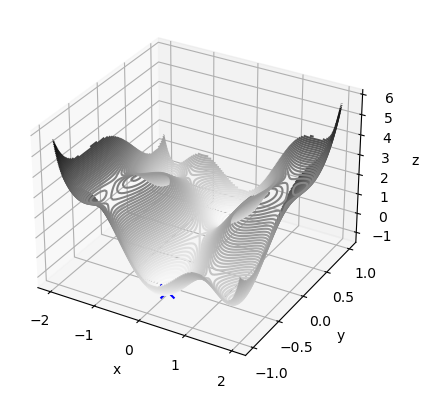

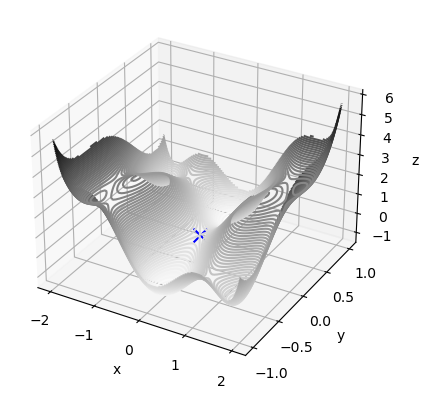

In [24]:
#1-2D minimization of a six-hump camelback function

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from scipy import fftpack
from matplotlib.colors import LogNorm
import pandas as pd
from scipy.integrate import odeint
def f(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2+ x[0]*x[1]+ (4*x[1]**2-4)*x[1]**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)


x, y = np.meshgrid(x, y)

z = np.zeros((100,100))

for i in range (100):
    for j in range (100):
        z[i,j]= f(np.array([x[i,j],y[i,j]]))


#Plot the function

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z,100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


minimum = optimize.minimize(f,(-0.5,-0.5)) 
#Plot the minimum found
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z,100,cmap="binary")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.scatter(minimum["x"][0],minimum["x"][1],f(minimum["x"]),marker="x",color = "b",s=100)


#Plot the minimum if the initial guess is (0,0)
minimum = optimize.minimize(f,(0,0))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z,100,cmap="binary")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.scatter(minimum["x"][0],minimum["x"][1],f(minimum["x"]),marker="x",color = "b",s=100)

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

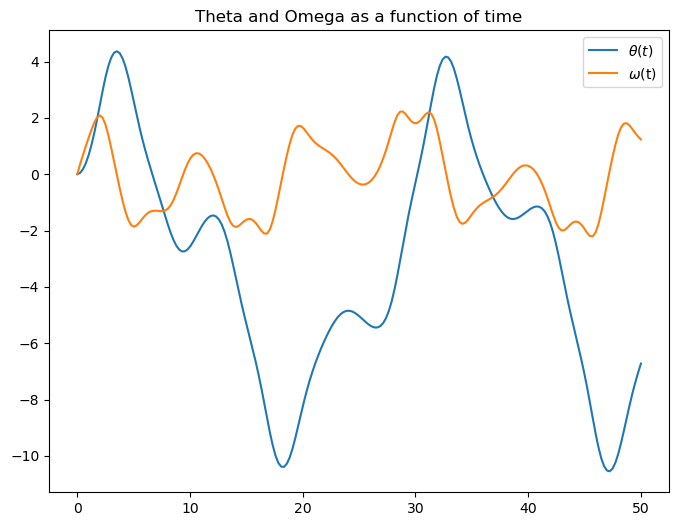

In [25]:
# Initial conditions
Xinit = (0,0)
𝑄 = 2.0
d = 1.5
Omega = 0.65
t = np.linspace(0, 50, 200)


# Defining the derivative
def derivative(X, t, Q, d, Omega):
    return(X[1], (-1/Q) * X[1] + np.sin(X[0]) + d * np.cos(Omega * t))

# call the odeint() method
X = odeint(derivative, Xinit , t, args=(Q, d, Omega))

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(t, X[:,0], label = r"$\theta(t)$")
plt.plot(t, X[:,1], label = r"$\omega$(t)")
plt.title('Theta and Omega as a function of time')
plt.legend(loc='best')

In [26]:
 Chaotic Motion

# Initial conditions
Xinit = (0,0)
𝑄 = 2.0
d = 1.5
Omega = 0.65
t = np.linspace(0, 50, 200)


# Defining the derivative
def derivative(X, t, Q, d, Omega):
    return(X[1], (-1/Q) * X[1] + np.sin(X[0]) + d * np.cos(Omega * t))

def plot_results(Xinit,t,Q,d,Omega):
    X = odeint(derivative, Xinit , t, args=(Q, d, Omega))
    plt.figure(figsize=(8, 6))
    plt.plot(t, X[:,0], label = r"$\theta(t)$")
    plt.plot(t, X[:,1], label = r"$\omega$(t)")
    plt.title('Theta and Omega as a function of time')
    plt.legend(loc='best')

for i in range(10):
    d= i
    Q = i+1
    Omega = i
    #Omega = 100+i
    plot_results(Xinit,t,Q,d,Omega)
# We can see that variating parameters the plot become more chaotic while Omega value is increasing
print('We can see that variating parameters the plot become more chaotic while Omega value is increasing')

SyntaxError: invalid syntax (2992505502.py, line 1)

In [ ]:
 Chaotic Motion

# Initial conditions
Xinit = (0,0)
𝑄 = 2.0
d = 1.5
Omega = 0.65
t = np.linspace(0, 50, 200)


# Defining the derivative
def derivative(X, t, Q, d, Omega):
    return(X[1], (-1/Q) * X[1] + np.sin(X[0]) + d * np.cos(Omega * t))

def plot_results(Xinit,t,Q,d,Omega):
    X = odeint(derivative, Xinit , t, args=(Q, d, Omega))
    plt.figure(figsize=(8, 6))
    plt.plot(t, X[:,0], label = r"$\theta(t)$")
    plt.plot(t, X[:,1], label = r"$\omega$(t)")
    plt.title('Theta and Omega as a function of time')
    plt.legend(loc='best')

for i in range(10):
    d= i
    Q = i+1
    Omega = i
    #Omega = 100+i
    plot_results(Xinit,t,Q,d,Omega)
# We can see that variating parameters the plot become more chaotic while Omega value is increasing
print('We can see that variating parameters the plot become more chaotic while Omega value is increasing')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [27]:
# Loading the data and choosing the features
data = pd.read_csv('data/populations.txt', delimiter='	')
display(data)
hare_pop = data['hare']
lynx_pop = data['lynx']
tot_pop = data['hare']+data['lynx']
date = data['year']
date = date.to_numpy()
hare_pop = hare_pop.to_numpy()
lynx_pop = lynx_pop.to_numpy()
tot_pop = tot_pop.to_numpy()


# Computing the FFTs
hare_fft = fftpack.fft(hare_pop)
hare_power = np.abs(hare_fft)
hare_sample_freq = fftpack.fftfreq(len(hare_fft), 1)

lynx_fft = fftpack.fft(lynx_pop)
lynx_power = np.abs(lynx_fft)
lynx_sample_freq = fftpack.fftfreq(len(lynx_fft), 1)

tot_fft = fftpack.fft(tot_pop)
tot_power = np.abs(tot_fft)
tot_sample_freq = fftpack.fftfreq(len(tot_fft), 1)

# Plot the FFT power
fig = plt.figure(figsize=(8, 6))
plt.plot(hare_sample_freq, hare_power, label='Hares')
plt.plot(lynx_sample_freq, lynx_power, label='Lynxes')
plt.plot(tot_sample_freq, tot_power, label='Total Population')
plt.legend(loc='best')
plt.title('Hares and Lynxes Population FFTs')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.show()

# Find the peak frequency: focus only on only the positive frequencies
hare_pos_mask = np.where(hare_sample_freq > 0)
hare_freqs = hare_sample_freq[hare_pos_mask]
hare_powes = hare_power[hare_pos_mask]

lynx_pos_mask = np.where(lynx_sample_freq > 0)
lynx_freqs = lynx_sample_freq[lynx_pos_mask]
lynx_powes = lynx_power[lynx_pos_mask]

tot_pos_mask = np.where(tot_sample_freq > 0)
tot_freqs = tot_sample_freq[tot_pos_mask]
tot_powes = tot_power[tot_pos_mask]

# Find the max of freqs array
hare_peak_freq = hare_freqs[hare_powes.argmax()]
print("Hares Peak frequency:", hare_peak_freq)
print('Hares period is : ', 1/hare_peak_freq, ' years \n')

lynx_peak_freq = lynx_freqs[lynx_powes.argmax()]
print("Lynxes Peak frequency:", lynx_peak_freq)
print('Lynxes period is : ' , 1/lynx_peak_freq, ' years \n')

tot_peak_freq = tot_freqs[tot_powes.argmax()]
print("Total Population Peak frequency:", tot_peak_freq)
print('Total population period is : ', 1/tot_peak_freq, ' years \n')

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


KeyError: 'year'

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

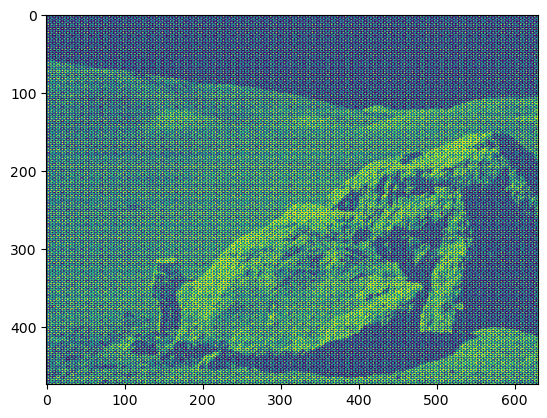

In [28]:
#4-FFT of an image

#import the image as 2D numpy array
image = plt.imread("images/moonlanding.png")
plt.imshow(image)

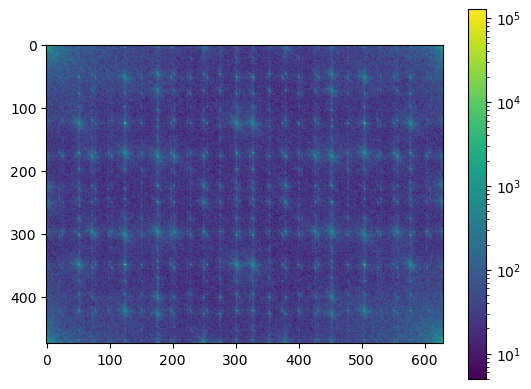

In [29]:
#Perform a 2D FFT
image_fft = fftpack.fft2(image)
image_abs = np.abs(image_fft)
plt.imshow(image_abs, norm=LogNorm(vmin=5))
plt.colorbar()
plt.show()

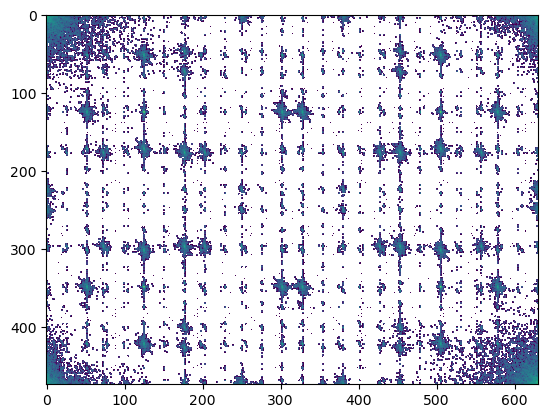

In [30]:

#Inspect the spectrum
value = 100.
filt = np.where(image_abs <= value)
image_fft[filt] = 0
im_abs = np.abs(image_fft)
plt.imshow(im_abs, norm=LogNorm(vmin=5))

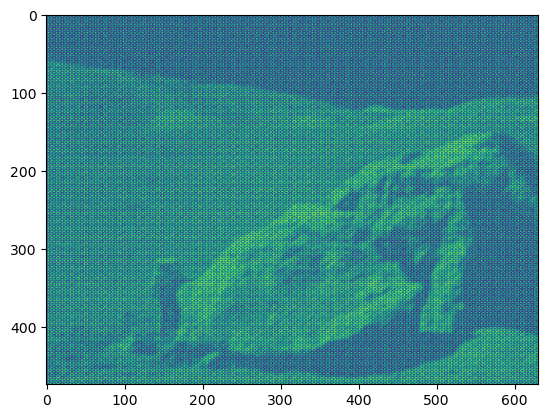

In [31]:


#Apply the inverse FFT

filtered_im = fftpack.ifft2(image_fft)
plt.imshow(np.real(filtered_im))
plt.show()